## ** ANALYSIS **

Random forest and k-nearest neighbors (kNN) will be used in predicting the outcome crime type and arrest or no arrest.


1. Decision Tree
2. Random Forest & Stratified Random Forest
3. Adaboost
4. KNN
5. Logit

Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant

**IMPORT THE NECESSARY PACKAGES**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics



**GET THE DATA AND RUN SOME SUMMARY STATS**

Prefer to use a sample because it takes time to run for the whole data.

In [ ]:
crime2 = pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)
crime3 = pd.read_csv('/content/Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
crime4 = pd.read_csv('/content/Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)

df_sample = pd.concat([crime2, crime3, crime4], ignore_index=False, axis=0)
#df_sample = crime2

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              int64
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(4), object(10)
memory usage: 1021.5+ MB


**DROP THE MISSING VALUES AND DUPLICATES**

In [ ]:
df_sample.dropna(axis=0, inplace=True)
df_sample.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
#df_sample.drop_duplicates(subset=['ID', 'Case Number', 'Date', 'Updated On', 'Beat', 'Ward'], inplace=True)

print(df_sample.shape)

(4273756, 23)


**DROP THE UNINFORMATIVE VARIABLES**

In [ ]:
df_sample = df_sample.drop(['Unnamed: 0'], axis=1)
df_sample = df_sample.drop(['ID'], axis=1)
df_sample = df_sample.drop(['Case Number'], axis=1) 

**"DATE"** variable can be turned into month-day-hour etc. 
Here, I drop it because I am not going to use that information 
except for the graph. 

In [ ]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second

# THIS IS VERY SLOW! I THINK WE DON'T EVEN NEED THIS PART BECAUSE WE ALREADY HAVE
# THE GRAPHS. SO, IF WE AGREE, WE CAN'T DELETE THIS PART AND JUST KEEP 'YEAR' AND
# DROP "DATE" VARIABLE.
# df['date2'] = pd.to_datetime(df['Date'])
# df['Year'] = df['date2'].dt.year
# df['Month'] = df['date2'].dt.month
# df['Day'] = df['date2'].dt.day
# df['Hour'] = df['date2'].dt.hour
# df = df.drop(['date2'], axis=1) 

In [ ]:
df_sample = df_sample.drop(['Date'], axis=1) 
df_sample = df_sample.drop(['Updated On'], axis=1)

**Convert Categorical Attributes to Numerical**


In [ ]:
df_sample['Block'] = pd.factorize(df_sample["Block"])[0]
df_sample['IUCR'] = pd.factorize(df_sample["IUCR"])[0]
df_sample['Description'] = pd.factorize(df_sample["Description"])[0]
df_sample['Location Description'] = pd.factorize(df_sample["Location Description"])[0]
df_sample['FBI Code'] = pd.factorize(df_sample["FBI Code"])[0]
df_sample['Location'] = pd.factorize(df_sample["Location"])[0] 
df_sample['Primary Type'] = pd.factorize(df_sample["Block"])[0]


**Get A Random Small Sample of the Data to Run Quicker**

In [ ]:
#df_sample_small = df_sample.sample(30000) ##sampling a part of the dataset  
#print(df_sample_small.shape)

(30000, 18)


**The dependent variable or target variable is the "Primary Type".**

In [ ]:
Target = 'Arrest'
print('Target: ', Target)

Target:  Arrest


**Run the following code for the graph.**
 
 



In [ ]:
# At previous plot, we could see that the classes is quite imbalance
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
#all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
#all_classes['Amt'] = all_classes['Block']
#all_classes = all_classes.drop(['Block'], axis=1)
#all_classes = all_classes.sort_values(['Amt'], ascending=[False])

#unwanted_classes = all_classes.tail(13)
#unwanted_classes

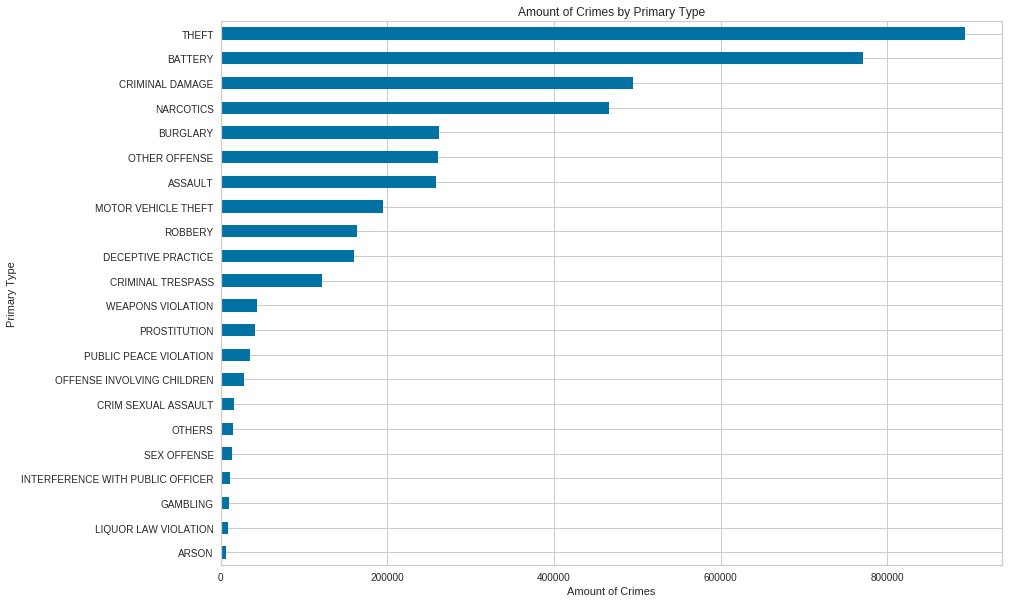

In [ ]:
# After that, we replaced it with label 'OTHERS'
#df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
#plt.figure(figsize=(14,10))
#plt.title('Amount of Crimes by Primary Type')
#plt.ylabel('Crime Type')
#plt.xlabel('Amount of Crimes')

#df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

#plt.show()

**Encode target labels into categorical variables:**


In [ ]:
df_sample_small['Arrest'] = pd.factorize(df_sample_small["Arrest"])[0] 
df_sample_small['Arrest'].unique()

array([0, 1])

**Split Dataframe to Target Class and Features**
 

In [ ]:
X = df_sample_small.drop(['Arrest'], axis=1)
Y = df_sample_small['Arrest']

print(X.shape)
print(Y.shape)

(30000, 17)
(30000,)


**Split dataset to Training Set & Test Set**


In [ ]:
X_train,  X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print ("Training Data Sizes for X and Y:", X_train.shape, Y_train.shape)
print ("Test Data Sizes for X and Y:", X_test.shape, Y_test.shape)

Training Data Sizes for X and Y: (24000, 17) (24000,)
Test Data Sizes for X and Y: (6000, 17) (6000,)


**Split Dataset to Train Set & Validation Set**

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state= 3) 

print ("Training Data Sizes for X and Y:", x_train.shape, y_train.shape)
print ("Test Data Sizes for X and Y:", x_val.shape, y_val.shape)


Training Data Sizes for X and Y: (19200, 17) (19200,)
Test Data Sizes for X and Y: (4800, 17) (4800,)


# DECISION TREE WITH GINI COEFFICIENT 

**1. Run the DT**

**2. Fit the model**

**3. Get the tree graph**

**4. Get the validation AND training accuracy**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dtree = DecisionTreeClassifier(criterion='gini', max_depth=5)
dtree.fit(x_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
df_sample_small.iloc[0, :]

Block                          4817
IUCR                             19
Primary Type                   4817
Description                      18
Location Description              6
Arrest                            0
Domestic                      False
Beat                            113
District                          1
Ward                             42
Community Area                   32
FBI Code                         10
X Coordinate            1.17458e+06
Y Coordinate            1.90212e+06
Year                           2005
Latitude                    41.8868
Longitude                  -87.6344
Location                      51117
Name: 1463034, dtype: object

In [ ]:
feature_cols = ['Block', 'IUCR', 'Primary Type', 'Description', 'Location Description' ,'Domestic','Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude' , 'Longitude', 'Location']

**TO GET THE DECISION TREE MAP:**
 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


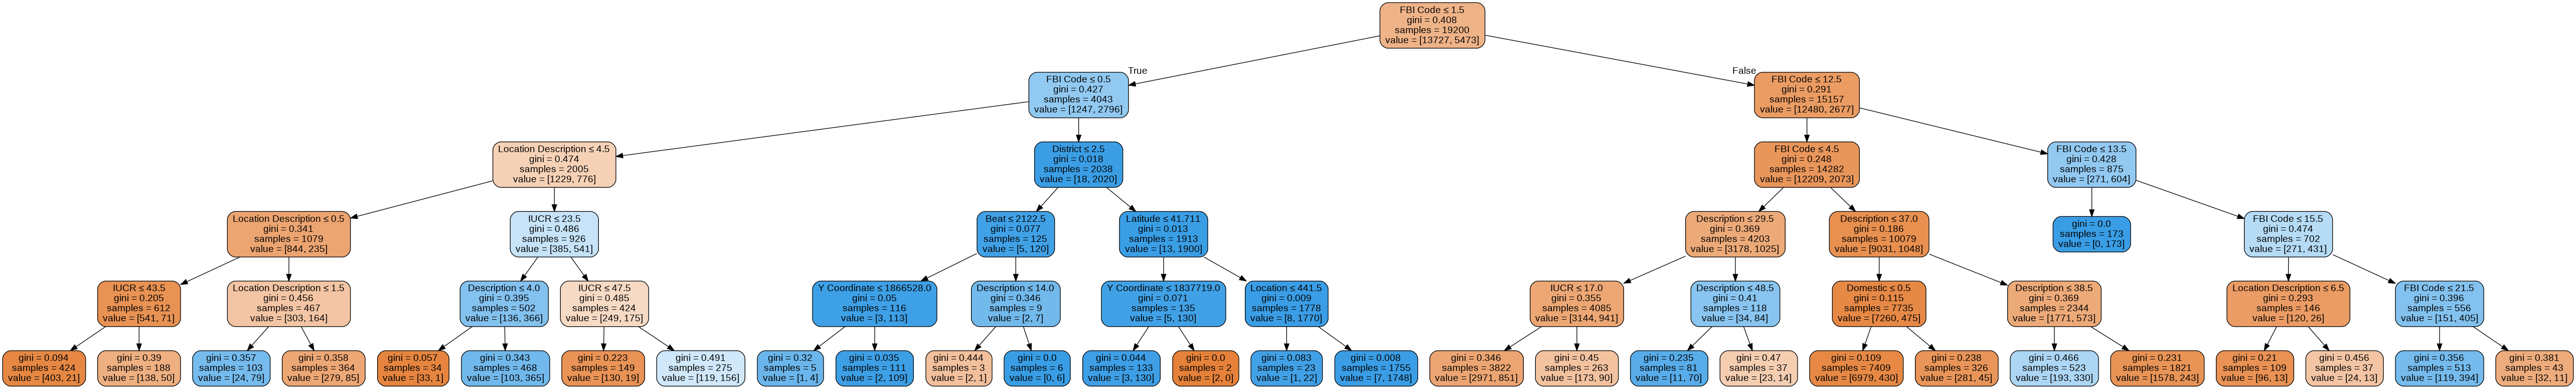

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

 
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())


**GET THE ACCURACY SCORE ON TRAIN and VALIDATION SETS**

In [ ]:
from sklearn.model_selection import cross_val_score
print (cross_val_score(dtree, x_train, y_train).mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8690101704126935


In [ ]:
from sklearn.model_selection import cross_val_score
print (cross_val_score(dtree, x_val, y_val).mean())

0.8566632423489228


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


**GET THE ACCURACY SCORE ON VALIDATION SETS**

# **Random Forest**

**1. Run the RF**

**2. Get the training accuracy**

**3. Fit the model**

**4. Get the validation accuracy**
 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

print (cross_val_score(RandomForestClassifier(n_estimators=200, max_features=2), x_train, y_train).mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8653127175051424


In [ ]:
#Stratified Kfold Validation will be important as our output class of arrest column has around three times more number of Non-arrest then arrest.
#Stratified Kfold validation which will increase Accuracy of random forest classifier significantly.
Y.value_counts()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean
from sklearn.metrics import precision_score

def stratified_cv_train(clf):
  sk = StratifiedKFold(n_splits=5, shuffle=True)
  train_accuracy=[]
  for (train, test), i in zip(sk.split(X, Y), range(5)):
    clf.fit(X.iloc[train], Y.iloc[train])
    predicted = clf.predict(X.iloc[train])
    train_accuracy.append(accuracy_score(Y.iloc[train],predicted))
  return mean(train_accuracy)

def stratified_cv_test(clf):
  cv = StratifiedKFold(n_splits=5, shuffle=True)
  test_accuracy=[]
  for (train, test), i in zip(sk.split(X, Y), range(5)):
    predicted = clf.predict(X.iloc[test])
    test_accuracy.append(accuracy_score(Y.iloc[test],predicted))
  return mean(test_accuracy)

In [ ]:
clf = RandomForestClassifier(n_estimators=200, oob_score=True)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("Avg. training accuracy:",stratified_cv_train(clf4))
print("Avg. test accuracy",stratified_cv_test(clf4))

In [ ]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(x_val)
accuracy = accuracy_score(y_val, predicted)
print('Out-of-bag score estimate: ', clf.oob_score_)
print('Mean accuracy score: ', accuracy)

Out-of-bag score estimate:  0.8711458333333333
Mean accuracy score:  0.8720833333333333


# **Adaboost!**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#print (cross_val_score(AdaBoostClassifier(n_estimators=50), x_train, y_train).mean())

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
clf2 = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.5)

# Train Adaboost Classifer
model = clf2.fit(x_train, y_train)

print (cross_val_score(AdaBoostClassifier(n_estimators=50), x_train, y_train).mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8624475237528387


In [ ]:
#Predict the response for test dataset
y_pred = model.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)

print('Mean accuracy score: ', accuracy)


Mean accuracy score:  0.8427083333333333


# **K-NN MODEL**

**1. Let's scale it first.**

**2. Then fit the model.**

**3. Get the accuracy**



In [ ]:
# Standardize the training set, and then apply the transformation values to the val set
#from sklearn.preprocessing import StandardScaler

# We will apply the standardization to the inner training set: validation and train1. 
#scaler = StandardScaler().fit(x_train)

# So, we apply the scaler transformation for train1 which includes all X and Y.
#x_train_std = scaler.transform(x_train)

# This is for the validation set. 
#x_val_std  = scaler.transform(x_val)


from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 15)

knn_model.fit(x_train, y_train)  #Fitting the model for the training dataset



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
y_pred1 = knn_model.predict(x_train)
print(metrics.accuracy_score(y_train, y_pred1))

0.7296354166666666


In [ ]:
#Predict the response for validation
##knn_val_predict = model.predict(x_val_std)
knn_val_predict = knn_model.predict(x_val)

accuracy_knnTrain = accuracy_score(y_val, knn_val_predict)

print('Mean Training / Validationaccuracy score: ', accuracy_knnTrain)

Mean Training / Validationaccuracy score:  0.698125


# **LOGIT**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

steps = [('scaler', StandardScaler()), ('classifier', LogisticRegression(multi_class="ovr"))]



from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps) 

# Use the cross_val_score on logistic regression on X_train_outer and y_train_outer with cv=10 and get scores
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
scores = cross_val_score(logreg, x_train,  y_train, cv=10, scoring='accuracy').mean()
print(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.7149479516347345


# Test on Your Test Data, and Report!

**We found that Random Forest gives the best accuracy rate.**

 

**Therefore, I choose RF model over Adaboost and Decision Tree. 
It's test score is 94.3%.**

In [ ]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_test)
accuracy = accuracy_score(Y_test, predicted)
#print('Out-of-bag score estimate: ', dtree.oob_score_)
print('Mean accuracy score: ', accuracy)

Mean accuracy score:  0.8706666666666667


**GET THE MOST IMPORTANT VARIABLES:**
 
**1. FBI Code seems to be the most important!**

**2. Location**

**3. IUCR**

**4. Description**

In [ ]:
# Print the name and gini importance of each feature
for feature in zip(feature_cols, clf.feature_importances_):
    print(feature)

('Block', 0.04298088829572196)
('IUCR', 0.11121668261965093)
('Primary Type', 0.04331688458932756)
('Description', 0.11052441468481283)
('Location Description', 0.059729781198647705)
('Domestic', 0.015181988311015755)
('Beat', 0.03353407072161547)
('District', 0.013433477376128742)
('Ward', 0.022840840528181718)
('Community Area', 0.022932615318965725)
('FBI Code', 0.27362513907166974)
('X Coordinate', 0.04223892470976473)
('Y Coordinate', 0.04109597723915734)
('Year', 0.03463229637931757)
('Latitude', 0.041332757711743544)
('Longitude', 0.041992944790546015)
('Location', 0.04939031645373262)
